In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import networkx as nx
from collections import Counter

rcParams['figure.figsize'] = (5, 5)
rcParams['font.size']=16

try:
  import infomap as im
except:
  %pip install Infomap
  import infomap as im

In [20]:
# Load the network from the .net file
G = nx.read_pajek('A3_synthetic_networks/A3_synthetic_networks/synthetic_network_N_300_blocks_5_prr_1.00_prs_0.02.net')

# Convert to a Graph object (optional, depending on your needs)
G = nx.Graph(G)

In [21]:
communities_louvain=nx.community.louvain_communities(G) ## Louvain algorithm
communities_greedy=nx.community.greedy_modularity_communities(G) ## Greedy algorithm

In [23]:
print('The number of communities detected with Louvain is:',len(communities_louvain))
print('The number of communities detected with Greedy is:',len(communities_greedy))
print('The number of communities detected with Infomap is:',len(communities_infomap))
print(' ')
print('The modularity of the Louvain partition is:',nx.community.quality.modularity(G,communities_louvain))
print('The modularity of the Greedy partition is:',nx.community.quality.modularity(G,communities_greedy))
print('The modularity of the Infomap partition is:',nx.community.quality.modularity(G,communities_infomap))

The number of communities detected with Louvain is: 5
The number of communities detected with Greedy is: 5
The number of communities detected with Infomap is: 5
 
The modularity of the Louvain partition is: 0.7239913469306816
The modularity of the Greedy partition is: 0.7239913469306816
The modularity of the Infomap partition is: 0.7239913469306816


In [25]:
colors_node_louvain=set_nodes_color(communities_louvain,G)
colors_node_greedy=set_nodes_color(communities_greedy,G)
colors_node_infomap=set_nodes_color(communities_infomap,G)

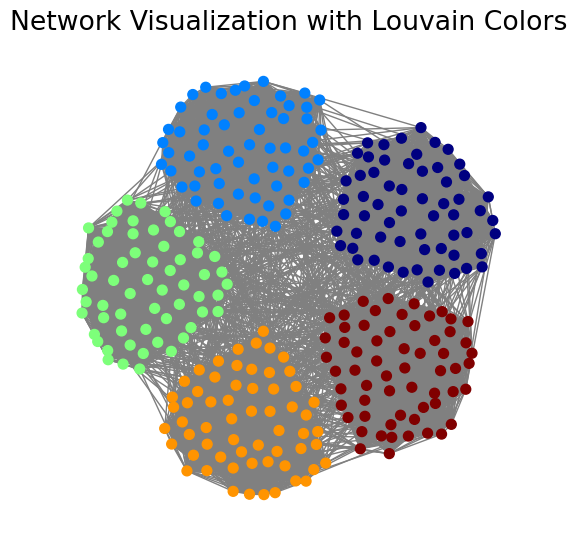

In [26]:
# Generate positions using Kamada-Kawai layout
pos = nx.kamada_kawai_layout(G)

# Draw the network
nx.draw(G, pos, node_color=colors_node_louvain, with_labels=False, node_size=50, edge_color='gray')
plt.title("Network Visualization with Louvain Colors")
plt.show()

# Solution

Given `prr`, obtain graph `G`.

In [38]:
def load_graph(prr):
    """
    Load a synthetic network graph from a .net file.
    
    Parameters:
    prr (float): Probability of rewiring edges.
    
    Returns:
    G (networkx.Graph): The loaded graph.
    """
    # Construct the filename based on the provided prr
    filename = f'A3_synthetic_networks/A3_synthetic_networks/synthetic_network_N_300_blocks_5_prr_{prr:.2f}_prs_0.02.net'
    
    # Load the network from the .net file
    G = nx.read_pajek(filename)
    
    # Convert to a Graph object (optional, depending on your needs)
    G = nx.Graph(G)
    
    return G

Given `G`, obtain `communities`, using Louvain

In [39]:
def get_louvain_communities(G):
    """
    Get the communities detected by the Louvain algorithm.
    
    Parameters:
    G (networkx.Graph): The input graph.
    
    Returns:
    list: A list of sets, where each set contains the nodes in a community.
    """
    # Detect communities using the Louvain algorithm
    communities = nx.community.louvain_communities(G)
    
    return communities

Given `G`, obtain `communities`, using Greedy

In [40]:

def get_greedy_communities(G):
    """
    Get the communities detected by the Greedy algorithm.

    Parameters:
    G (networkx.Graph): The input graph.
    Returns:
    list: A list of sets, where each set contains the nodes in a community.
    """
    # Detect communities using the Greedy algorithm
    communities = nx.community.greedy_modularity_communities(G)
    
    return communities

Given `G`, obtain `communities`, using Infomap

In [41]:
from infomap import Infomap
from collections import defaultdict

def infomap_to_networkx_communities(mapping,infomap_partition):
    """
    Convert Infomap partition to NetworkX communities format.
    
    Parameters:
    mapping (dict): Mapping from Infomap node IDs to NetworkX node IDs. Obtained using Infomap's add_networkx_graph method.
    infomap_partition (dict): Mapping from Infomap node IDs to community IDs. Obtained using Infomap's get_modules method.
    
    """

    community_dict = defaultdict(set)
    for node, community in infomap_partition.items():
        community_dict[community].add(mapping[node])
    
    return list(community_dict.values())

def get_infomap_communities(G):
    """
    Get the communities detected by the Infomap algorithm.
    
    Parameters:
    G (networkx.Graph): The input graph.
    
    Returns:
    list: A list of sets, where each set contains the nodes in a community.
    """
    # Create an Infomap instance
    im = Infomap(silent=True) 
    
    # Add the networkx graph to Infomap
    mapping = im.add_networkx_graph(G)
    
    # Run the Infomap algorithm
    im.run()
    
    # Get the node-to-community mapping
    node_community_infomap = im.get_modules()
    
    # Convert to a list of communities
    communities_infomap = infomap_to_networkx_communities(mapping, node_community_infomap)
    
    return communities_infomap

Given `G` and its `communities`, get the amount of detected communities and their modularity

In [42]:
def get_communities_modularity(G, communities):
    """
    Calculate the modularity of a given partition of the graph.
    
    Parameters:
    G (networkx.Graph): The input graph.
    communities (list): A list of sets, where each set contains the nodes in a community.
    
    Returns:
    float: The modularity of the partition.
    """
    return nx.community.quality.modularity(G, communities)

def get_communities_count(communities):
    """
    Count the number of communities in a given partition.

    Parameters:
    communities (list): A list of sets, where each set contains the nodes in a community.
    Returns:
    int: The number of communities.
    """
    return len(communities)


Make `communities_even` — "true" partitioning

In [43]:
def make_even_communities(G):
    """
    Split the graph into 5 communities evenly.
    
    Parameters:
    G (networkx.Graph): The input graph.
    
    Returns:
    list: A list of sets, where each set contains the nodes in a community.
    """
    nodes = list(G.nodes())
    num_communities = 5
    community_size = len(nodes) // num_communities

    even_communities = [set(nodes[i * community_size:(i + 1) * community_size]) for i in range(num_communities)]
    
    return even_communities

Given two communities, calculate Jaccard Index between them.

In [44]:
def jaccard_index(partition1, partition2):
    """
    Calculate the Jaccard Index between two partitions.

    Parameters:
    partition1 (list of sets): First partition, where each set represents a community.
    partition2 (list of sets): Second partition, where each set represents a community.

    Returns:
    float: Jaccard Index between the two partitions.
    """
    intersection_size = 0
    union_size = 0

    for community1 in partition1:
        for community2 in partition2:
            intersection_size += len(community1 & community2)
            union_size += len(community1 | community2)

    return intersection_size / union_size if union_size > 0 else 0

Given two communities, calculate NMI between them

In [45]:
# Convert communities to labels for NMI calculation
def communities_to_labels(communities, nodes):
    labels = [-1] * len(nodes)
    node_to_index = {node: i for i, node in enumerate(nodes)}
    for community_id, community in enumerate(communities):
        for node in community:
            labels[node_to_index[node]] = community_id
    return labels

from sklearn.metrics import normalized_mutual_info_score

def calculate_nmi(partition1, partition2, G):
    """
    Calculate the Normalized Mutual Information (NMI) between two partitions.

    Parameters:
    partition1 (list of sets): First partition, where each set represents a community.
    partition2 (list of sets): Second partition, where each set represents a community.
    G (networkx.Graph): The input graph.

    Returns:
    float: NMI between the two partitions.
    """
    # Convert communities to labels
    nodes = list(G.nodes())
    labels_partition1 = communities_to_labels(partition1, nodes)
    labels_partition2 = communities_to_labels(partition2, nodes)

    # Calculate NMI
    nmi = normalized_mutual_info_score(labels_partition1, labels_partition2)
    
    return nmi

Given two communities, calculate NVI between them

In [46]:
from numpy import log2


def variation_of_information(partition1, partition2):
    """
    Calculate the Variation of Information (VI) between two partitions.

    Parameters:
    partition1 (list of sets): First partition, where each set represents a community.
    partition2 (list of sets): Second partition, where each set represents a community.

    Returns:
    float: Variation of Information (VI) between the two partitions.
    """
    total_nodes = sum(len(community) for community in partition1)
    mutual_information = 0
    entropy1 = 0
    entropy2 = 0

    for community1 in partition1:
        prob1 = len(community1) / total_nodes
        entropy1 -= prob1 * log2(prob1)
        for community2 in partition2:
            prob2 = len(community2) / total_nodes
            intersection = len(community1 & community2)
            if intersection > 0:
                prob_intersection = intersection / total_nodes
                mutual_information += prob_intersection * log2(prob_intersection / (prob1 * prob2))

    for community2 in partition2:
        prob2 = len(community2) / total_nodes
        entropy2 -= prob2 * log2(prob2)

    vi = entropy1 + entropy2 - 2 * mutual_information
    return vi

def normalized_variation_of_information(partition1, partition2):
    """
    Calculate the Normalized Variation of Information (NVI) between two partitions.

    Parameters:
    partition1 (list of sets): First partition, where each set represents a community.
    partition2 (list of sets): Second partition, where each set represents a community.

    Returns:
    float: Normalized Variation of Information (NVI) between the two partitions.
    """
    vi = variation_of_information(partition1, partition2)
    total_nodes = sum(len(community) for community in partition1)
    max_entropy = log2(total_nodes) if total_nodes > 0 else 1
    return vi / max_entropy

Given `G` and `communities`, obtain color coding

In [47]:
def set_nodes_color(communities, G):
    colors=plt.cm.jet(np.linspace(0,1,len(communities))) ## Get the colors for the communities
    community_node={} ## Dictionary to store the community of each node
    count_community=0 ## Counter for the communities' labels

    for community in communities: ## For each community
        for node in community: ## For each node in the community
            community_node[node]=count_community ## Store the label of the community of the node
        count_community=count_community+1 ## Update the counter

    color_nodes=[] ## List to store the color of each node
    for node in G.nodes():  
        color_nodes.append(colors[community_node[node]]) ## Get the color of the node

    return color_nodes

Given `G`, positions and color coding for nodes, plot the network

In [48]:
def plot_network(G, pos, node_colors, algo_name, prr):
    """
    Plot the network with the given node colors.

    Parameters:
    G (networkx.Graph): The input graph.
    pos (dict): A dictionary with nodes as keys and positions as values.
    node_colors (list): A list of colors for each node in the graph.
    algo_name (str): The name of the algorithm used for coloring.
    """
    plt.figure(figsize=(10, 10))
    nx.draw(G, pos, node_color=node_colors, with_labels=False, node_size=50, edge_color='gray')
    plt.title(algo_name + ", prr=" + str(prr))
    plt.axis('off')
    plt.show()

Given `prr`, `even_communities` and `communities`, obtain DataTable with metrics for each algo

# Preparation

1. Get "true" positions - run Kamada-Kawai on the network with PRR 1.00
2. Pregenerate a range of PRR from 0.00 to 1.00 with the step 0.02

# Execution

1. Get `G` for given `prr`
2. Generate the "true" partitioning `even_communities`.
3. Calculate the `communities_louvain`, `communities_greedy`, `communities_infomap`.
4. Get lengths and modularities
5. Get JI, NMI, NVI
6. if `prr` == 0.02, 0.16 or 1.00, get color coding for communities for each algo
7. Draw the `G` using true positions and color coding

In [37]:
G100 = load_graph(1.00)
true_positions = nx.kamada_kawai_layout(G100)